<a href="https://colab.research.google.com/github/Liqgy/6610412007/blob/main/Ml_6610412007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

dfh = pd.read_csv('https://raw.githubusercontent.com/Liqgy/6610412007/main/Housing.csv')
print(dfh.head())
print(dfh.shape)
print(dfh.info())
print(dfh.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (tot

In [5]:
#X = data[["area","bedroom","bathroom","stories"]]
X = data.iloc[:,1:5]
print(X.head())

   area  bedrooms  bathrooms  stories
0  7420         4          2        3
1  8960         4          4        4
2  9960         3          2        2
3  7500         4          2        2
4  7420         4          1        2


In [6]:
Y = data[["price"]]
print(y.head())

      price
0  13300000
1  12250000
2  12250000
3  12215000
4  11410000


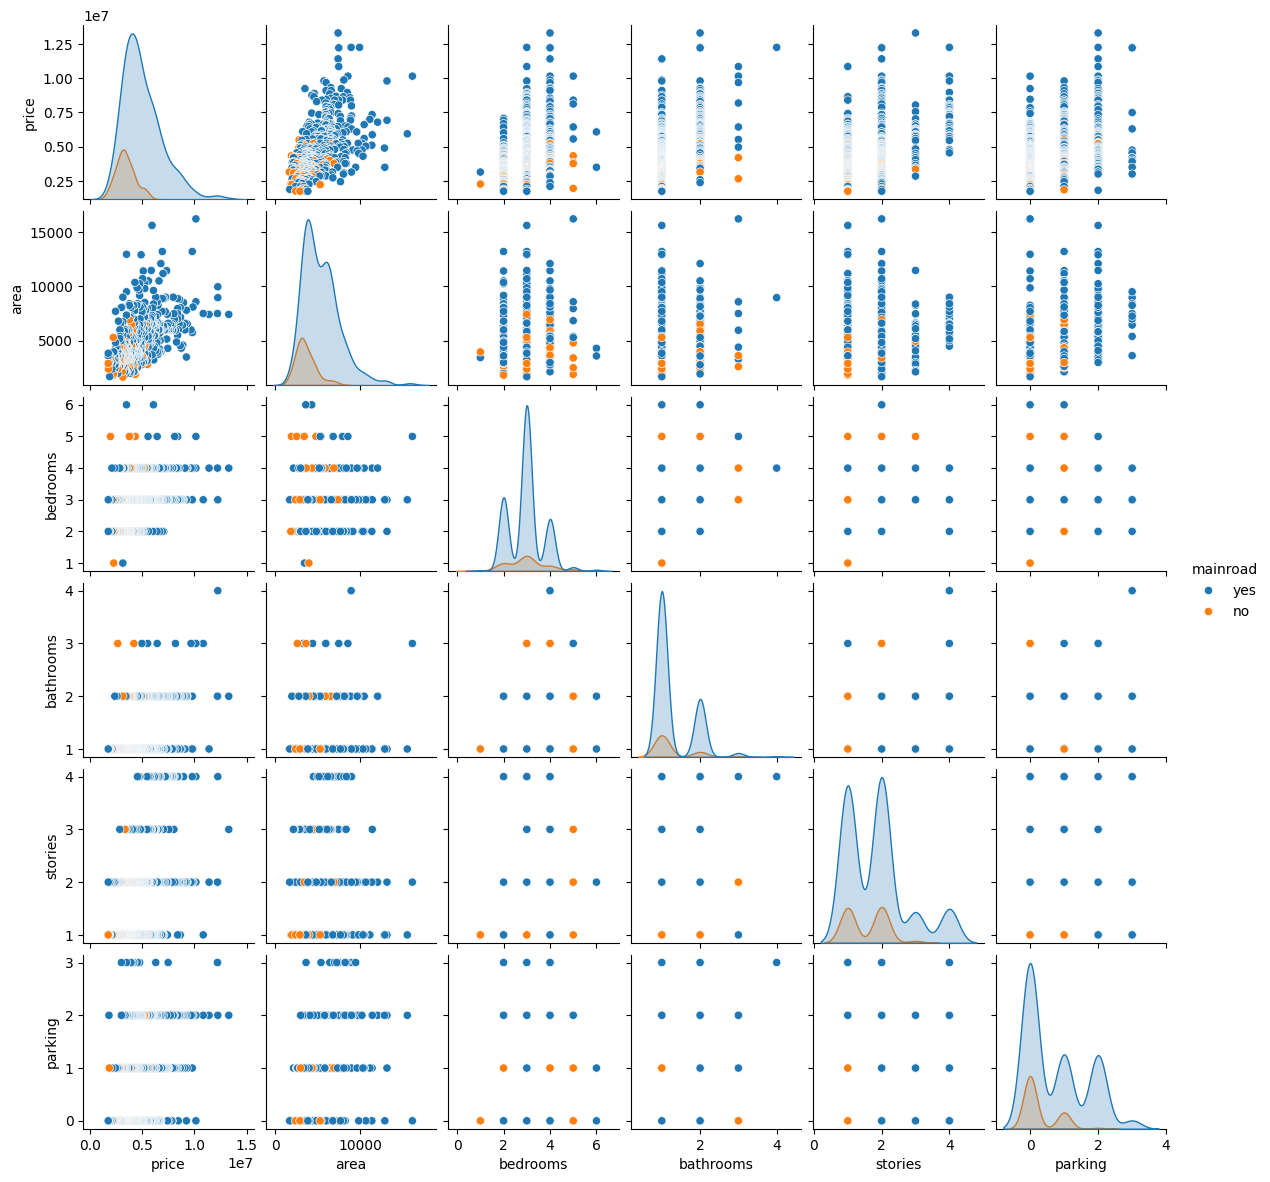

In [11]:
sns.pairplot(dfh,hue='mainroad', height=2)


<Axes: xlabel='mainroad', ylabel='price'>

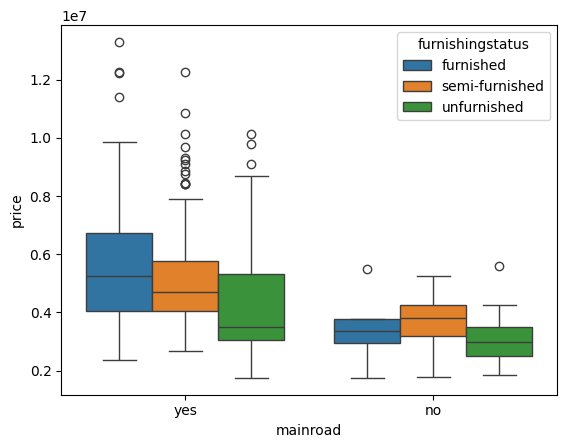

In [32]:
sns.boxplot(x = 'mainroad', y = 'price', hue = 'furnishingstatus', data = dfh)

<ipython-input-40-8abcf88c9bc4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfh.corr()


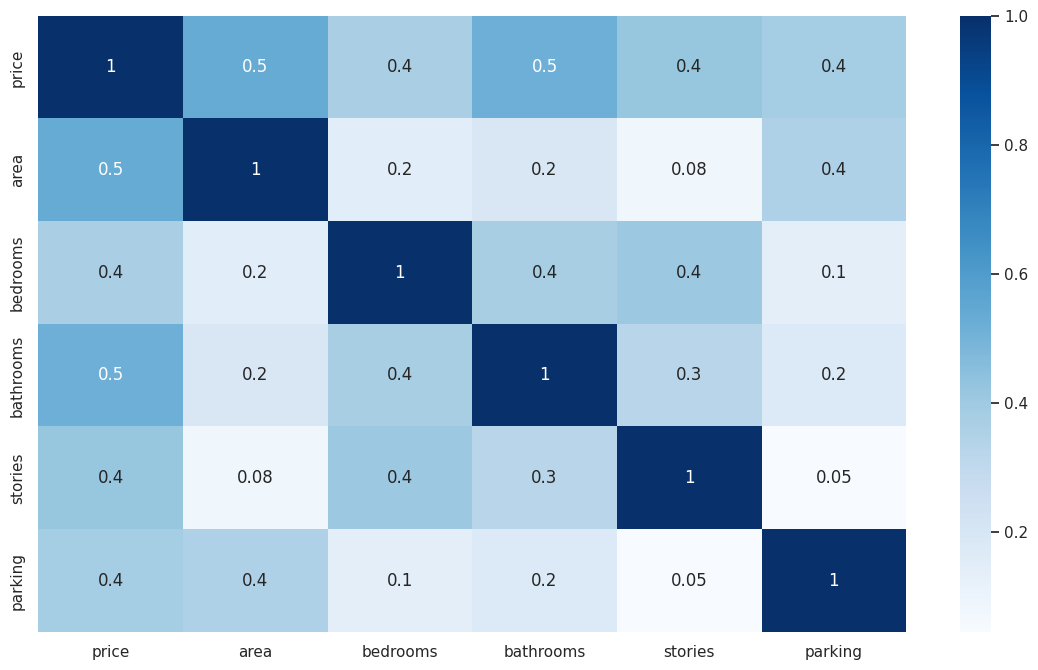

In [40]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dfh.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [43]:
def ch(x,dfh):
    temp = pd.get_dummies(dfh[x], drop_first = True).astype(int)
    dfh = pd.concat([dfh, temp], axis = 1)
    dfh.drop([x], axis = 1, inplace = True)
    return dfh

In [44]:
dfh = ch('mainroad',dfh)
dfh = ch('guestroom',dfh)
dfh= ch('hotwaterheating',dfh)
dfh = ch('basement',dfh)
dfh = ch('airconditioning',dfh)
dfh = ch('prefarea',dfh)
dfh = ch('furnishingstatus',dfh)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(436, 13)  <class 'pandas.core.frame.DataFrame'>
(436,) 	  <class 'pandas.core.series.Series'>
(109, 13)  <class 'pandas.core.frame.DataFrame'>
(109,) 	  <class 'pandas.core.series.Series'>


In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X_test)
print(y_pred)

[5933976.97585128 2634303.16807511 3133742.40904463 4266408.49640954
 2041812.2725415  4504149.84382581 7118896.83158847 2984544.571076
 7609350.3393169  3625542.60744618 4968525.83708375 6029640.81942669
 3269057.05485247 4463474.04220843 5668289.16907602 5904201.15301761
 5571485.7739249  5748585.21307713 3908292.71105485 3184418.13140106
 5681563.8421167  3771332.38263077 2609568.49303015 4285180.73212824
 3925391.19221313 2775625.3243319  3827368.43630803 7253038.29668111
 2880282.04649507 5934981.88375574 2611765.7475066  2962572.02631154
 2365240.39168945 4853824.80363297 4223100.76375393 4145018.02355864
 7204456.29077804 3816233.59897317 2991697.57910612 3363443.38359397
 4483761.29259951 3770814.4402016  4751927.3045598  4512979.06749605
 5258968.28934472 6092851.92588302 4019955.86006366 4551535.76533159
 4266428.41855572 4767820.3809993  6126517.55738465 7973159.88827348
 3786908.2625192  5531514.42845883 6366110.61709641 4517572.60071059
 4299726.82786987 3686223.18648859 5

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_test_s = scaler.transform(X_test)
print(x_test_s)

[[ 0.16117836  0.04727831 -0.57018671 ... -0.55403469 -0.84488844
  -0.6964292 ]
 [-0.92269542  0.04727831 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]
 [-0.99187885  1.40341936 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]
 ...
 [-1.04722559  0.04727831 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]
 [ 0.3917898   0.04727831  1.42181174 ... -0.55403469 -0.84488844
   1.43589615]
 [ 3.59452149  0.04727831 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]]


In [54]:
result = lin_reg.predict(x_test_s)
print(result)

[ 1815415.98767191 -3760113.6902078  -2395002.72345037 -1767387.26202987
 -4435985.6862146   2487513.28850883  2260755.98466249 -2977243.92170473
  4458765.23616512 -1767682.84404182    93651.90192772  6239414.31739271
 -1923462.44258564  1322920.87500132  1412731.6421068   2382853.44359147
  2690344.52058853  2450588.4541738   -923955.22175067 -2443485.02639247
  1307590.8890378   -951861.48561828 -3226458.38935306  -769987.69371234
  -279936.73628682 -3070766.6208928  -1247606.2109528   2799255.34709193
 -3390728.13138998  4932558.38703365 -3226457.37592902 -2977254.05594514
 -3497513.10536154   -10604.75826571   596896.40779579   502872.78978714
  5195306.50190311  1645420.27491331 -2748874.77894067 -1365395.35362917
  -646295.28124435 -1445823.65686435  1687422.28339479   150636.50999905
   521840.51605628   795796.58504514   399114.91636929    93459.57656528
  -711954.59347778  2487634.89939375  2077655.11558435  4364945.42899138
 -1761678.9254291   1585264.40764013  2491060.59554

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
from sklearn.metrics import mean_squared_error
Mse = mean_squared_error(y_test, y_pred)
print(Mse)

1073445195630.6523


In [57]:
import pickle
from google.colab import files
pickle.dump(lin_reg, open('ml_6610412007.sav', 'wb'))
files.download('ml_6610412007.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>